In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import flowtracks
from flowtracks import io

In [2]:
# get frames where trajectories appeared 
frames_range = [np.int(tr.time()[-1]) for tr in io.iter_trajectories_ptvis('./test_data/ptv_is.%d')]
print(frames_range[0],frames_range[-1])

101001 101025


In [3]:
max_frame = 101010
trajectories = [tr for tr in io.iter_trajectories_ptvis('./test_data/ptv_is.%d') if tr.time()[-1] <= max_frame]
print(f"{len(trajectories)} trajectories")

229 trajectories


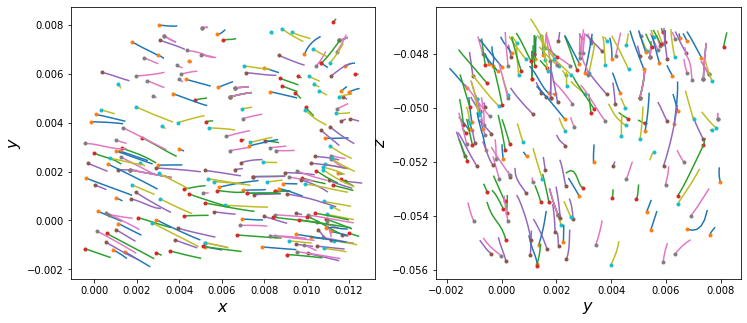

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
for tr in trajectories:
    ax[0].plot(tr.pos()[:,0],tr.pos()[:,1])
    ax[0].plot(tr.pos()[0,0],tr.pos()[0,1],'.')
    ax[0].set_xlabel('$x$',fontsize=16)
    ax[0].set_ylabel('$y$',fontsize=16)
    
    ax[1].plot(tr.pos()[:,1],tr.pos()[:,2])
    ax[1].plot(tr.pos()[0,1],tr.pos()[0,2],'.')
    ax[1].set_xlabel('$y$',fontsize=16)
    ax[1].set_ylabel('$z$',fontsize=16)

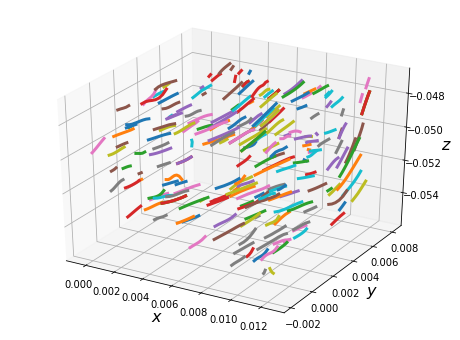

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for traj in trajectories:
    ax.plot(traj.pos()[:,0], traj.pos()[:,1], traj.pos()[:,2], '-',lw=3)
    ax.set_xlabel('$x$',fontsize=16)
    ax.set_ylabel('$y$',fontsize=16)
    ax.set_zlabel('$z$',fontsize=16)

plt.show()

In [6]:
# from flowtracks.io import save_particles_table

In [7]:
# save_particles_table('test.h5',trajectories)

In [8]:
# from flowtracks.io import Scene
from flowtracks.scene import Scene
from flowtracks.graphics import pdf_graph

In [19]:
scn = Scene('./test_h5/traj_RC.h5')

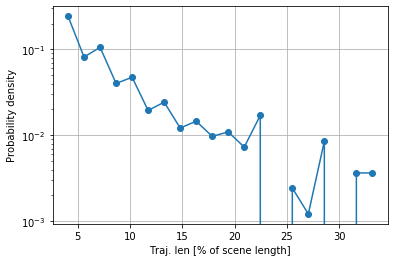

In [20]:
# Plot distribution of trajectory lengths
frames = 0.
for frame in scn.iter_frames():
    frames += 1

lens = np.array([len(trj) for trj in scn.iter_trajectories()])
pdf_graph(lens/frames*100, 20, log_density=True)

plt.xlabel("Traj. len [% of scene length]")
plt.ylabel("Probability density")
# plt.legend(legends)
plt.grid()
plt.show()